# Exploring Machine Learning Models

Predicting Housing Price :
This is part of my project submission (Machine learning fundamentals - Beginner). As part of this Project, I took the Housing Price data set and applied Linear regression, Decision Tree, Random Forest and KNN models to find the best fit. 

<img src="https://github.com/SudhakarAnemu/AI-DS-ML-DL-Materials/blob/master/images/house_price.jpg?raw=true" width="200" height="200"/>

**INDEX**

1. [Objective]()
2. [EDA and Profiling]()
 - 2.1.[Importing all required Libraries]()
 - 2.2 [Read the Dataset]()
 - 2.3 [Features and Descriptions]()
 - 2.4 [Preprofiling and Observations]()
 - 2.5 [Feature selection]()
 - 2.5.1. [Unique values of each feature]()
 - 2.5.2. [Description of each feature]()
 - 2.6 [Creating a new data frame from the original data frame.]()
 - 2.7 [About SalesPrice Feature]()
 - 2.8 [About OveralQual Feature]()
 - 2.9. [About GrLivArea Feature]()
 - 2.10 [About TotalBsmtSF Feature]()
 - 2.11 [About GarageCars Feature]()
 - 2.12 [Verify relation among all independent feature vs SalePrice]()
 - 2.13 [Visualise correlation between Independent and SalePrice feature]()
3. [Modeling]()
 - 3.1 [Preparing X and y (Training and Test Datasets)]()
    - 3.1.1 [Standardization]()
    - 3.1.2 [Splitting X and y into Training and Test Data]()
    - 3.1.3 [Preparation of Feature columns and & X, y]()
 - 3.2. [Linear Regression]()
 - 3.3. [Decision Tree]()
 - 3.4 [Random Forest]()
 - 3.5 [KNN]()
4. [Model's Evaluation]()

### 1. Objective

This notebook is talking about the analysis of the Housing data set in different ways and predicting the Sale price of the House. Different models were applied to do the same. This dataset has 1460 observations and 80 features. Identified 5 feature's which are most correlated with the SalePrice and applied different algorithms to find the best fit. 

##  2. EDA, Profiling

### 2.1 Importing all required Libraries

Here, we imported all basic Libraries Pandas, Seaborn, Numpy and Model related Libraries LLinear, DecisionTree, RandomForest, KNN. 

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
# allow plots to appear direcly in the notebook
%matplotlib inline
plotly.tools.set_credentials_file(username='sudhakar.anemu', api_key='gsV5SUHPip75363I87dw')
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
print("Import completed")

Import completed


### 2.2 Read the Housing Dataset (Import the dataset to the Notebook)

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-2/master/Projects/house_data.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Understanding about the Dataset, by this we read all below attributes of the Dataset. 
<br>a. Shape
<br>b. Columns
<br>c. Information
<br>d. Desription
<br>e. Checking Null

In [76]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Shape of the Dataset : ", df.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Columns of the data frame : ",df.columns)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Info of the Dataset : ", df.info())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Description of the Dataset : ", df.describe())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Verify the count of Null", df.isnull().sum())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of the Dataset :  (1460, 80)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Columns of the data frame :  Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
  

1. Dataset has 1460 observations and 80 features.
2. Observed more null values with respect to the features. 
3. Ultimately we need to identify the price of the House
4. We need to identify the features for futher analysis. It is the first challenge.



### 2.3 Features vs Descriptions. 


S.No | Feature and Description|Consider||
-|----------------|---------------|----|
1|MSSubClass|Ignore|
2|MSZoning|Ignore|
3|LotFrontage|Ignore|
4|LotArea: Lot size in square feet|Ignore|
5|Street: Type of road access|Ignore|
6|Alley: Type of alley access|Ignore|
7|LotShape: General shape of property|Ignore|
8|LandContour: Flatness of the property|Ignore|
9|Utilities: Type of utilities available|Ignore|
10|LotConfig: Lot configuration|Ignore|
11|LandSlope: Slope of property|Ignore|
12|Neighborhood: Physical locations within Ames city limits|Ignore|
13|Condition1: Proximity to main road or railroad|Ignore|
14|Condition2: Proximity to main road or railroad (if a second is present)|Ignore|
15|BldgType: Type of dwelling|Ignore|
16|HouseStyle: Style of dwelling|Ignore|
17|OverallQual: Overall material and finish quality|Yes|
18|OverallCond: Overall condition rating|Ignore|
19|YearBuilt: Original construction date|Yes|
20|YearRemodAdd: Remodel date|Yes|
21|RoofStyle: Type of roof|Ignore|
22|RoofMatl: Roof material|Ignore|
23|Exterior1st: Exterior covering on house|Ignore|
24|Exterior2nd: Exterior covering on house (if more than one material)|Ignore|
25|MasVnrType: Masonry veneer type|Ignore|
26|MasVnrArea: Masonry veneer area in square feet|Yes|
27|ExterQual: Exterior material quality|Ignore|
28|ExterCond: Present condition of the material on the exterior|Ignore|
29|Foundation: Type of foundation|Ignore|
30|BsmtQual: Height of the basement|Ignore|
31|BsmtCond: General condition of the basement|Ignore|
32|BsmtExposure: Walkout or garden level basement walls|Ignore|
33|BsmtFinType1: Quality of basement finished area|Ignore|
34|BsmtFinSF1: Type 1 finished square feet|Yes|
35|BsmtFinType2: Quality of second finished area (if present)|Ignore|
36|BsmtFinSF2: Type 2 finished square feet|Ignore|
37|BsmtUnfSF: Unfinished square feet of basement area|Ignore|
38|TotalBsmtSF: Total square feet of basement area|Yes|
39|Heating: Type of heating|Ignore|
40|HeatingQC: Heating quality and condition|Ignore|
41|CentralAir: Central air conditioning|Ignore|
42|Electrical: Electrical system|Ignore|
43|1stFlrSF: First Floor square feet|Yes|
44|2ndFlrSF: Second floor square feet|Ignore|
45|LowQualFinSF: Low quality finished square feet (all floors)|Ignore|
46|GrLivArea: Above grade (ground) living area square feet|Yes|
47|BsmtFullBath: Basement full bathrooms|Ignore|
48|BsmtHalfBath: Basement half bathrooms|Ignore|
49|FullBath: Full bathrooms above grade|Yes|
50|HalfBath: Half baths above grade|Ignore|
51|Bedroom: Number of bedrooms above basement level|Ignore|
52|Kitchen: Number of kitchens|Ignore|
53|KitchenQual: Kitchen quality|Ignore|
54|TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)|Yes|
55|Functional: Home functionality rating|Ignore|
56|Fireplaces: Number of fireplaces|Ignore|
57|FireplaceQu: Fireplace quality|Ignore|
58|GarageType: Garage location|Ignore|
59|GarageYrBlt: Year garage was built|Yes|
60|GarageFinish: Interior finish of the garage|Ignore|
61|GarageCars: Size of garage in car capacity|Yes|
62|GarageArea: Size of garage in square feet|Yes|
63|GarageQual: Garage quality|Ignore|
64|GarageCond: Garage condition|Ignore|
65|PavedDrive: Paved driveway|Ignore|
66|WoodDeckSF: Wood deck area in square feet|Ignore|
67|OpenPorchSF: Open porch area in square feet|Ignore|
68|EnclosedPorch: Enclosed porch area in square feet|Ignore|
69|3SsnPorch: Three season porch area in square feet|Ignore|
70|ScreenPorch: Screen porch area in square feet|Ignore|
71|PoolArea: Pool area in square feet|Ignore|
72|PoolQC: Pool quality|Ignore|
73|Fence: Fence quality|Ignore|
74|MiscFeature: Miscellaneous feature not covered in other categories|Ignore|
75|MiscVal: $Value of miscellaneous feature|Ignore|
76|MoSold: Month Sold|Ignore|
77|YrSold: Year Sold|Ignore|
78|SaleType: Type of sale|Ignore|
79|SaleCondition: Condition of sale|Ignore|

### 2.4 Preprofiling information and observations. 

Below are observations from pre-profiling of the Housing Dataset : <br>

1. Number of variables	81
2. Number of observations	1460
3. Total Missing (%)	5.9%
4. Total size in memory	924.0 KiB
5. Average record size in memory	648.1 B
6. Variables types :
7. Numeric	38
8. Categorical	43
9. Boolean	0
10. Date	0
11. Text (Unique)	0
12. Rejected	0 (It is very difficult since Rejected is Zero, so that we need to manually identify which are all features needs to identify for furrther analysis.)


### 2.5 Feature selections

A. Below features are identified based on correlation with Salels price. 


1. OverallQual
2. Year Built
3. Year Remod Aadd
4. MasVnrArea
5. BsmtFinSfF1
6. TotalBsmtSF
7. 1stFlrSF
8. GrLiveArea
9. FullBath
10. TotRmsAbvGrd
11. GarageyRBlt
12. GarageCars
13. GarageArea

B. Below are finalyzed for futher analysis to predict the SalePrice

1. SalePrice
2. OverallQual is strongly correlated with SlalePrice
3. GrLivArea is strongly correlated with SlalePrice
4. GarageCars (GarageCars, GarageArea both are same so we selected GarageCars alone)
5. TotalBsmtSF (TotalBsmtSF and 1stFloor are same so we selected TotalBsmtSF)
6. FullBath
7. YearBuilT

Text(0.5, 1.0, 'Correlation among all features : ')

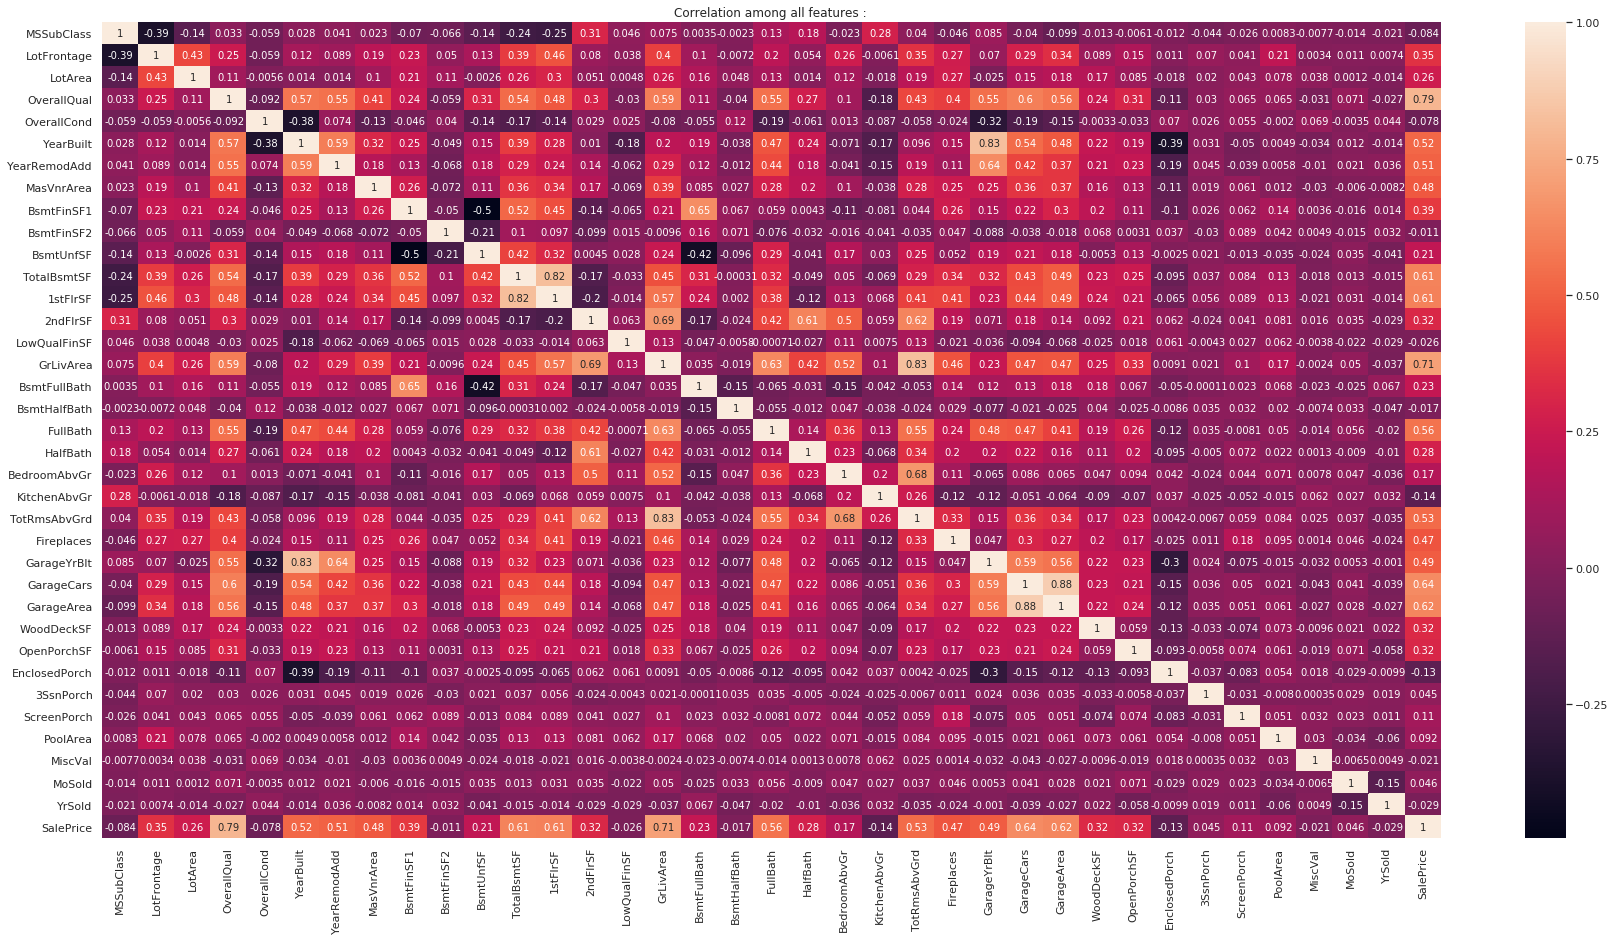

In [78]:
# f, ax = plt.subplots(figsize=(20, 10))
# sns.heatmap(df.corr(), vmax=.8, square=True);
corr = df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True)
plt.title("Correlation among all features : ")

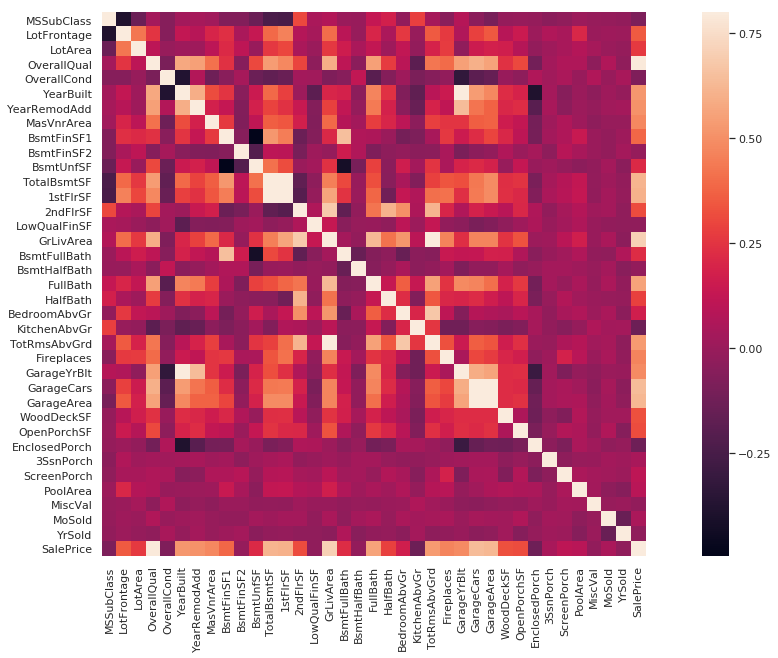

In [77]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmax=.8, square=True);

Names of columns :  Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


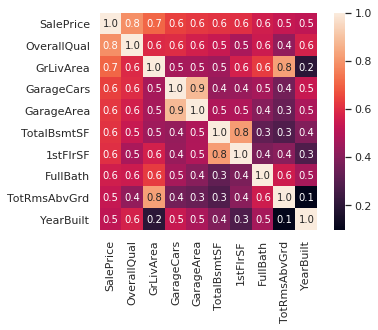

In [79]:
cols = df.corr().nlargest(10, 'SalePrice')['SalePrice'].index #Finding 10 larget columns from the SalePriceColumn
print("Names of columns : ", cols)
cm = np.corrcoef(df[cols].values.T) #It will give value of correlation coefficient
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#sns.heatmap( df.corr(), annot=True );

#### 2.5.1 Unique values under each feature

In [80]:
colList = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("Name of the column : ",colList[i])
    print(df[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  OverallQual
[ 7  6  8  5  9  4 10  3  1  2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 2 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  GrLivArea
[1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1600  900 1704  520
 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425 1739 1720
 2945  780 1158 1111 1370 2034 2473 2207 1479  747 2287 2223  845 1718
 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065 1474 2417 1560
 1224 1526  990 1235  964 2291 1588  960  835 1225 1610 1732 1535 1226
 1818 1992 1047  789 1517 1844 1855 1430 2696 2259 2320 1458 1092 1125
 3222 1456 1123 1080 1199 1586  754  958  840 1348 1053 2157 2054 132

#### 2.5.2 Description of each features

Objservations : 

1. No missing values on all selected features. 
2. More data was provided at the analysis of individual features


In [81]:
colList = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("Name of the column : ",colList[i])
    print(df[colList[i]].describe())
    print("--- Inforamtion of the feature ---")
#     print(df[colList[i]].info)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
--- Inforamtion of the feature ---
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 2 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
--- Inforamtion of the feature ---
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 3 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Name of the column :  

### 2.6 Creating a new Dataframe from old Dataframe(with respect to the selected features.)

In [82]:
df1 = pd.DataFrame([df.OverallQual,df.GrLivArea,df.GarageCars,df.TotalBsmtSF,df.FullBath,df.YearBuilt, df.SalePrice]).transpose()
print("First few rows : \n", df1.head(5))
print("Share of the new DataFrame : ", df1.shape)

First few rows : 
     OverallQual  GrLivArea  GarageCars  ...  FullBath  YearBuilt  SalePrice
Id                                      ...                                
1             7       1710           2  ...         2       2003     208500
2             6       1262           2  ...         2       1976     181500
3             7       1786           2  ...         2       2001     223500
4             7       1717           3  ...         1       1915     140000
5             8       2198           3  ...         2       2000     250000

[5 rows x 7 columns]
Share of the new DataFrame :  (1460, 7)


#### 2.6.1 Correlation of selected Features(Independent) vs Sales Feature

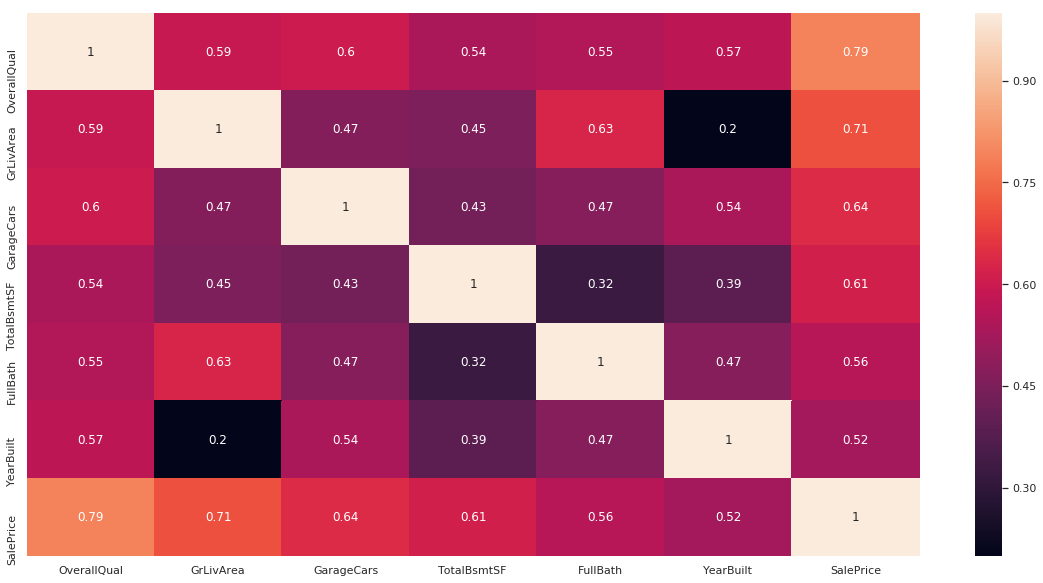

In [83]:
f, ax = plt.subplots(figsize=(20, 10))
# sns.heatmap(df1.corr(), vmax=.8, square=True);
sns.heatmap( df1.corr(), annot=True );

In [84]:
print("\nLets take highly corrleated columns for further analysis : GrLivArea, GarageCars and TotalBsmtSF")
dataset = pd.DataFrame([df.OverallQual,df.GrLivArea,df.GarageCars, df.TotalBsmtSF, df.FullBath, df.YearBuilt, df.SalePrice]).transpose()
print("First few rows : \n", dataset.head(5))
print("Share of the new DataFrame : ", dataset.shape)
print("")


Lets take highly corrleated columns for further analysis : GrLivArea, GarageCars and TotalBsmtSF
First few rows : 
     OverallQual  GrLivArea  GarageCars  ...  FullBath  YearBuilt  SalePrice
Id                                      ...                                
1             7       1710           2  ...         2       2003     208500
2             6       1262           2  ...         2       1976     181500
3             7       1786           2  ...         2       2001     223500
4             7       1717           3  ...         1       1915     140000
5             8       2198           3  ...         2       2000     250000

[5 rows x 7 columns]
Share of the new DataFrame :  (1460, 7)



In [85]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Shape of the Dataset : ", dataset.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Columns of the data frame : ",dataset.columns)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Info of the Dataset : ", dataset.info())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Description of the Dataset : ", dataset.describe())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Verify the count of Null", dataset.isnull().sum())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of the Dataset :  (1460, 7)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Columns of the data frame :  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'SalePrice'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(7)
memory usage: 131.2 KB
Info of the Dataset :  None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Description of the Dataset :         OverallQual    GrLivArea  ...    YearBuilt      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.0

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(7)
memory usage: 131.2 KB


### 2.7 About SalesPrice feature

1. Normal distribution 
2. Right skew
3. Min 34900
4. 755000
5. Mean 201685.74057315235

SalePrice data : Min 34900
SalePrice data : Max 755000
SalePrice data : Mean 201685.74057315235


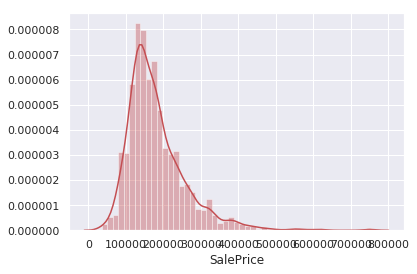

In [87]:
# Distribution of Features

arr = dataset["SalePrice"].unique()
# print("Price data : ", arr)
print("SalePrice data : Min", arr.min())
print("SalePrice data : Max", arr.max())
print("SalePrice data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.SalePrice, color="r", hist=True, kde=True)



Verified log of the SalePrice, Now it is perfectly Normal Distributed, any way we did Normalizaiotn before applying Algorithms


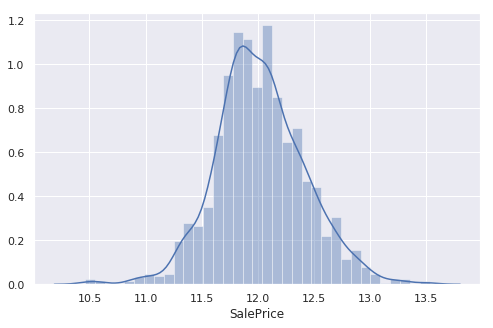

In [88]:
print("\nVerified log of the SalePrice, Now it is perfectly Normal Distributed, any way we did Normalizaiotn before applying Algorithms")
plt.figure(figsize=(8,5))
sns.distplot(np.log1p(dataset['SalePrice']), kde='False')

### 2.8 About OverallQual Feature

1. Normal distribution 
2. OverallQual data : Min 1
3. OverallQual data : Max 10
4. OverallQual data : Mean 5.5

OverallQual data : Min 1
OverallQual data : Max 10
OverallQual data : Mean 5.5


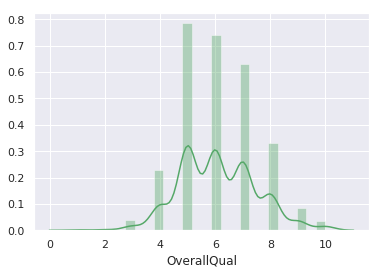

In [89]:
# Distribution of Features

arr = dataset["OverallQual"].unique()
# print("Price data : ", arr)
print("OverallQual data : Min", arr.min())
print("OverallQual data : Max", arr.max())
print("OverallQual data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.OverallQual, color="g", hist=True, kde=True)

### 2.9 About GrLivArea Feature

1. Normal distribution 
2. GrLivArea data : Min 334
3. GrLivArea data : Max 5642
4. GrLivArea data : Mean 1620.993031358885

GrLivArea data : Min 334
GrLivArea data : Max 5642
GrLivArea data : Mean 1620.993031358885


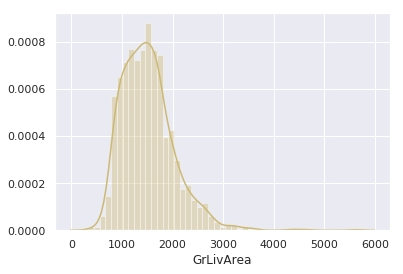

In [90]:
# Distribution of Features

arr = dataset["GrLivArea"].unique()
# print("GrLivArea : ", arr)
print("GrLivArea data : Min", arr.min())
print("GrLivArea data : Max", arr.max())
print("GrLivArea data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.GrLivArea, color="y", hist=True, kde=True)

### 2.10 About TotalBsmtSF

1. Norml distributed and Right skewed
2. TotalBsmtSF data : Min 0
3. TotalBsmtSF data : Max 6110
4. TotalBsmtSF data : Mean 1187.0166435506242

TotalBsmtSF data : Min 0
TotalBsmtSF data : Max 6110
TotalBsmtSF data : Mean 1187.0166435506242


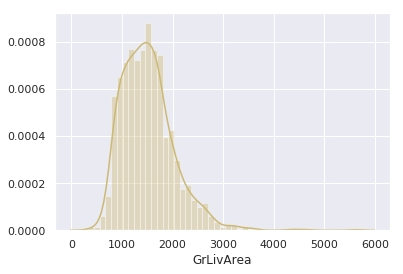

In [91]:
# Distribution of Features

arr = dataset["TotalBsmtSF"].unique()
# print("TotalBsmtSF : ", arr)
print("TotalBsmtSF data : Min", arr.min())
print("TotalBsmtSF data : Max", arr.max())
print("TotalBsmtSF data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.GrLivArea, color="y", hist=True, kde=True)

### 2.11 About GarageCars Feature

1. Normal distribution 
2. GarageCars data : Min 0
3. GarageCars data : Max 4
4. GarageCars data : Mean 2.0

GarageCars data : Min 0
GarageCars data : Max 4
GarageCars data : Mean 2.0


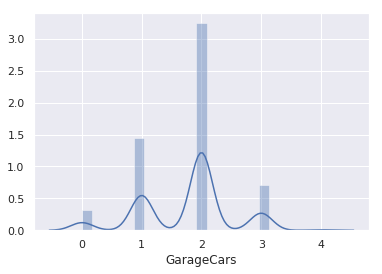

In [92]:
# Distribution of Features

arr = dataset["GarageCars"].unique()
# print("GrLivArea : ", arr)
print("GarageCars data : Min", arr.min())
print("GarageCars data : Max", arr.max())
print("GarageCars data : Mean", arr.mean())
sns.set();
sns.distplot(dataset.GarageCars, color="b", hist=True, kde=True)

### 2.12 Verify relateion between all indipendet variable and SalePrice

All indipendent feature's are very correlated with SalePrice feature

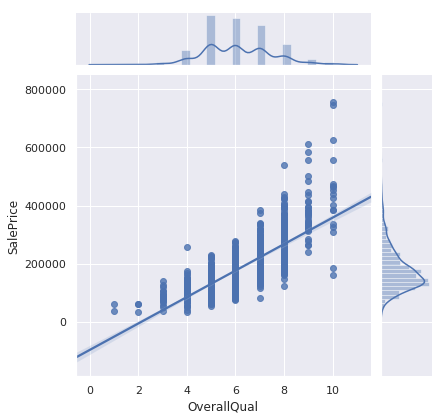

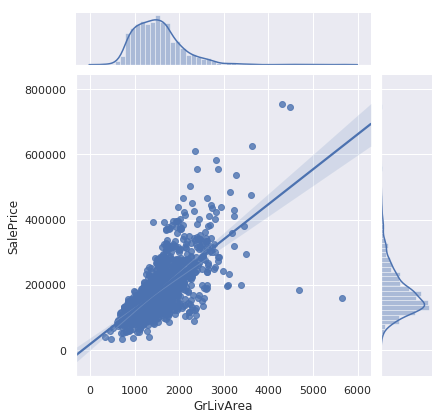

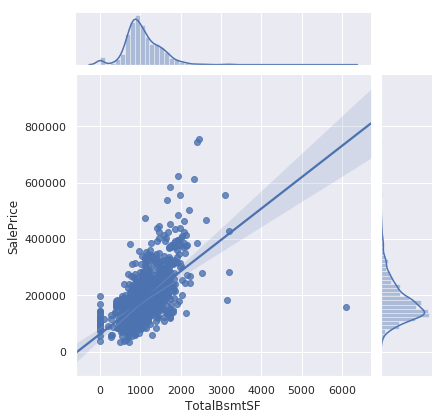

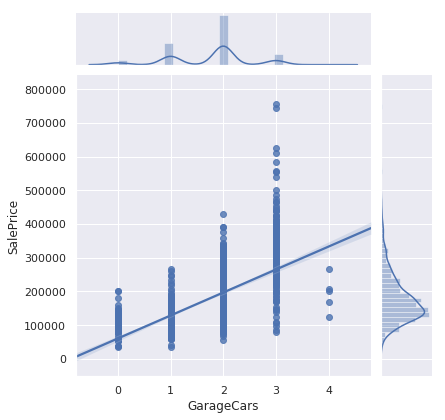

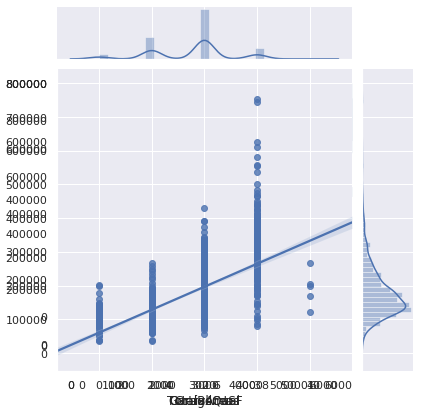

In [93]:
JG1 = sns.jointplot("OverallQual", "SalePrice", data=dataset, kind='reg')
JG2 = sns.jointplot("GrLivArea", "SalePrice", data=dataset, kind='reg')
JG3 = sns.jointplot("TotalBsmtSF", "SalePrice", data=dataset, kind='reg')
JG4 = sns.jointplot("GarageCars", "SalePrice", data=dataset, kind='reg')
#subplots migration
f = plt.figure()
for J in [JG1,JG2,JG3,JG4]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

### 2.13 Visualise correlation between Independent and SalePrice feature

Could see a good coorelation among dependent and Independent variables.

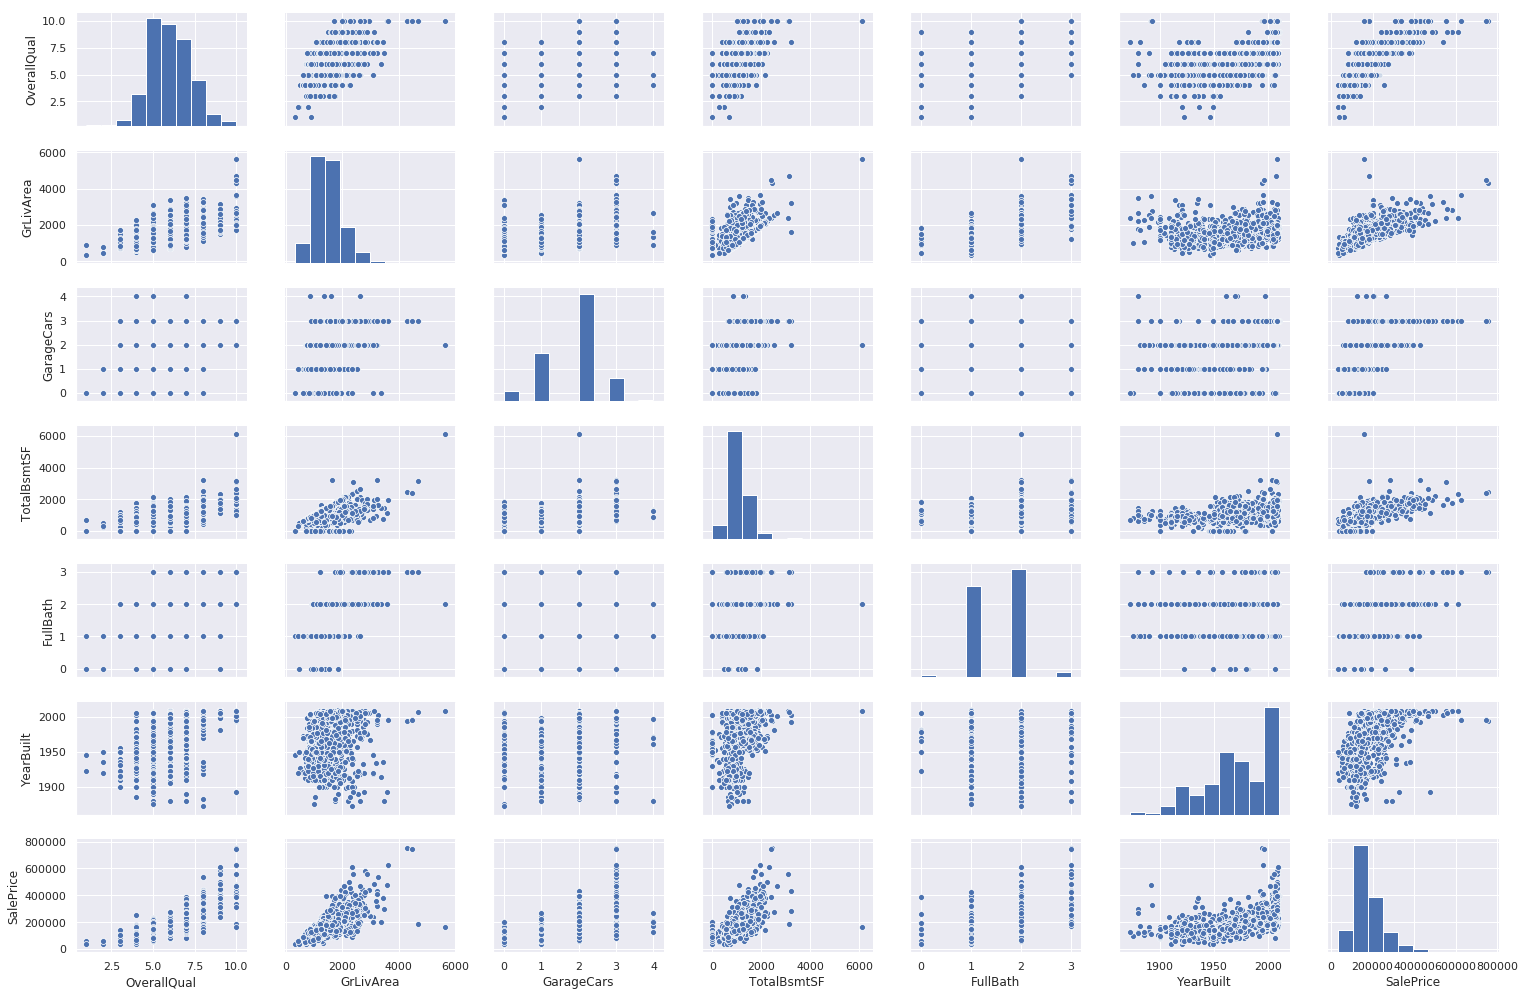

In [94]:
sns.pairplot(dataset, size = 2, aspect = 1.5)

In [95]:
print("Verified Infor of new dataset, all are int so we are good for analysis.")
dataset.info()

Verified Infor of new dataset, all are int so we are good for analysis.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
SalePrice      1460 non-null int64
dtypes: int64(7)
memory usage: 131.2 KB


In [96]:
dataset.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
Id,,,,,,,
1,7,1710,2,856,2,2003,208500
2,6,1262,2,1262,2,1976,181500
3,7,1786,2,920,2,2001,223500
4,7,1717,3,756,1,1915,140000
5,8,2198,3,1145,2,2000,250000
6,5,1362,2,796,1,1993,143000
7,8,1694,2,1686,2,2004,307000
8,7,2090,2,1107,2,1973,200000
9,7,1774,2,952,2,1931,129900


## 3. Modeling

#### 3.1 Preparing X and y using Pandas

##### Standardization
Standardize features by removing the mean and scalling to unit standard deviation

In [97]:
from sklearn.preprocessing import StandardScaler
  
scaler = StandardScaler().fit(dataset)
print("", dataset.head(1))
data1 = scaler.transform(dataset)
data = pd.DataFrame(data1)
data.head()

     OverallQual  GrLivArea  GarageCars  ...  FullBath  YearBuilt  SalePrice
Id                                      ...                                
1             7       1710           2  ...         2       2003     208500

[1 rows x 7 columns]


,0,1,2,3,4,5,6
0,0.651479,0.370333,0.311725,-0.459303,0.789741,1.050994,0.347273
1,-0.071836,-0.482512,0.311725,0.466465,0.789741,0.156734,0.007288
2,0.651479,0.515013,0.311725,-0.313369,0.789741,0.984752,0.536154
3,0.651479,0.383659,1.650307,-0.687324,-1.026041,-1.863632,-0.515281
4,1.374795,1.299326,1.650307,0.199680,0.789741,0.951632,0.869843


In [98]:
data.columns = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']
data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,0.651479,0.370333,0.311725,-0.459303,0.789741,1.050994,0.347273
1,-0.071836,-0.482512,0.311725,0.466465,0.789741,0.156734,0.007288
2,0.651479,0.515013,0.311725,-0.313369,0.789741,0.984752,0.536154
3,0.651479,0.383659,1.650307,-0.687324,-1.026041,-1.863632,-0.515281
4,1.374795,1.299326,1.650307,0.199680,0.789741,0.951632,0.869843


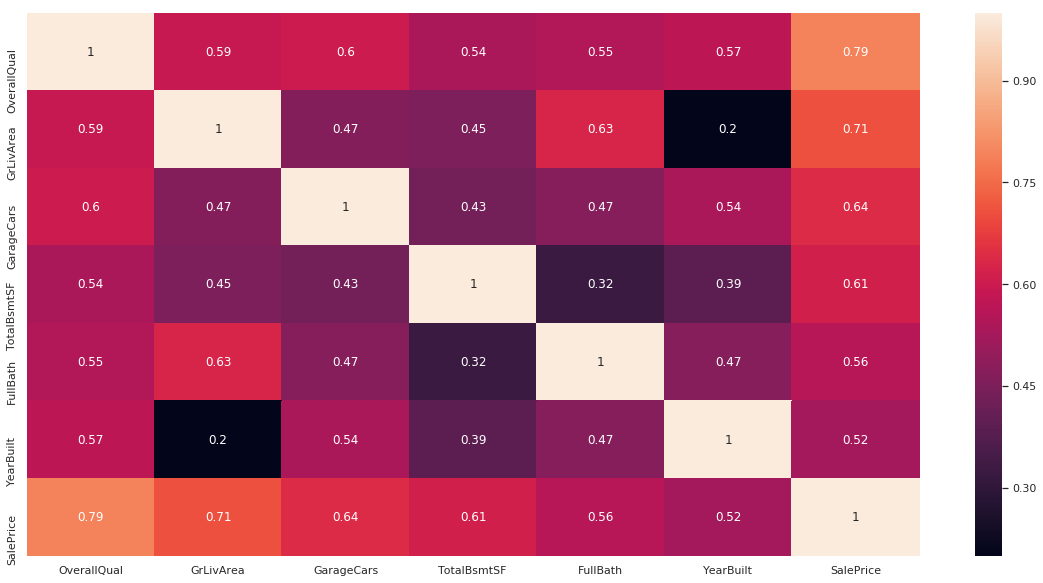

In [99]:
f, ax = plt.subplots(figsize=(20, 10))
# sns.heatmap(df1.corr(), vmax=.8, square=True);
sns.heatmap( data.corr(), annot=True );

##### Splitting X and y into Training and Test Data

##### Preparation of Feature Columns & X, y

In [100]:
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
 feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF']
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars']
#  feature_cols = ['OverallQual','GrLivArea']
print("Feature columns : ", feature_cols)

Feature columns :  ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']


In [101]:
X = data[feature_cols]
print("Head of X : ", X.head(2))
print("Type of X : ", type(X))
print("Shape of X : ", X.shape)
y = data.SalePrice
print("Head of y : ", y.head(2))
print("Type of y : ", type(y))
print("Shape of y : ", y.shape)

Head of X :     OverallQual  GrLivArea  GarageCars  TotalBsmtSF
0     0.651479   0.370333    0.311725    -0.459303
1    -0.071836  -0.482512    0.311725     0.466465
Type of X :  <class 'pandas.core.frame.DataFrame'>
Shape of X :  (1460, 4)
Head of y :  0    0.347273
1    0.007288
Name: SalePrice, dtype: float64
Type of y :  <class 'pandas.core.series.Series'>
Shape of y :  (1460,)


In [102]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)
  
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=1)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1168, 4)
y_train shape:  (1168,)

Test cases as below
X_test shape:  (292, 4)
y_test shape:  (292,)


In [103]:
X_train.head(5)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF
921,-0.795151,1.303133,-2.365440,0.489267
520,-1.518467,-0.421594,-2.365440,-2.411167
401,0.651479,-0.391136,0.311725,0.575915
280,0.651479,0.888132,0.311725,-0.571033
1401,-0.071836,0.147604,0.311725,-0.498066


In [104]:
y_train.head(5)

921    -0.440988
520    -0.940262
401    -0.200606
280     0.599114
1401    0.152097
Name: SalePrice, dtype: float64

In [105]:
X_test.head(5)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF
258,0.651479,0.526435,0.311725,-0.215319
267,-0.795151,1.287904,-1.026858,-0.769412
288,-0.795151,-1.171641,-1.026858,-0.400017
649,-1.518467,-1.685633,-2.365440,-0.974631
1233,-0.795151,-0.623384,0.311725,0.297729


In [106]:
y_test.head(5)

258     0.636890
267    -0.017896
288    -0.741938
649    -1.214139
1233   -0.490097
Name: SalePrice, dtype: float64

#### 3.2 Linear Regression



##### Performing Non GridSearch for the Model predection

In [107]:
# Dirct code
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train) # This line figured out best fit
y_pred_test = linreg.predict(X_test)
# print("y_pred_test is : ", y_pred_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE test is : ", RMSE_test)
#linreg.predict({[s,s,s,s]}) ---->>> This will predict the actual sales

RMSE test is :  0.4654163307035226


In [0]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 15,refit = True) # Here I played with cv 10, 15 and 20
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))
        
#         print("End of the Function")

    return linreg

In [109]:
print("Feature cols : ", feature_cols)
X = data[feature_cols]  
y = data.SalePrice
linreg = linear_reg(X,y)
print("End")

Feature cols :  ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
End


In [110]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -0.004294446634896643
Coefficients: [0.41053494 0.26743789 0.19648607 0.17115571]


In [111]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)  

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.004294446634896643
OverallQual 0.41053494453289635
GrLivArea 0.2674378860670598
GarageCars 0.19648606757445816
TotalBsmtSF 0.17115571039729535


Here is the finaly formula : 
y = -0.00429 + 0.41053 OverallQual + 0.2674 GrLivArea + 0.1964 GarageCars + 0.1711 TotalBsmtSF

<br>Note - Depending on your dependent/outcome variable, a negative value for your constant/intercept should not be a cause for concern. This simply means that the expected value on your dependent variable will be less than 0 when all independent/predictor variables are set to 0.

###### Using Model for predection

In [0]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)  

###### Model evaluation using Metrics
__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [113]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.3195495225467711
MAE for test set is 0.3120654446557433
MSE for training set is 0.24645046145609692
MSE for test set is 0.21661236088553074
RMSE for training set is 0.4964377719876852
RMSE for test set is 0.4654163307035226


###### Model evaluation using Rsquared value.
- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [114]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R_Squared and Adjusted R Squared of Training : ", r_squared, adjusted_r_squared)

R_Squared and Adjusted R Squared of Training :  0.7448693686258845 0.7439918772024138


In [115]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R_Squared and Adjusted R Squared of Test : ", r_squared, adjusted_r_squared)

R_Squared and Adjusted R Squared of Test :  0.8084493534293753 0.8057796580067882


##### Performing GridSearch for the Model predection

In [116]:
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
 feature_cols = ['OverallQual','GrLivArea', 'GarageCars', 'TotalBsmtSF']
# feature_cols = ['OverallQual','GrLivArea', 'GarageCars']
#  feature_cols = ['OverallQual','GrLivArea']
print("Feature columns : ", feature_cols)

Feature columns :  ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']


In [117]:
X = data[feature_cols]
print("Head of X : ", X.head(2))
print("Type of X : ", type(X))
print("Shape of X : ", X.shape)
y = data.SalePrice
print("Head of y : ", y.head(2))
print("Type of y : ", type(y))
print("Shape of y : ", y.shape)

Head of X :     OverallQual  GrLivArea  GarageCars  TotalBsmtSF
0     0.651479   0.370333    0.311725    -0.459303
1    -0.071836  -0.482512    0.311725     0.466465
Type of X :  <class 'pandas.core.frame.DataFrame'>
Shape of X :  (1460, 4)
Head of y :  0    0.347273
1    0.007288
Name: SalePrice, dtype: float64
Type of y :  <class 'pandas.core.series.Series'>
Shape of y :  (1460,)


In [118]:
linreg = linear_reg(X,y,True) # for performing GridSearchCV.

Mean cross-validated score of the best_estimator :  0.7175391295399476
RMSE for the test set is 0.21661236088553082


In [119]:
print('Intercept:',linreg.best_estimator_.intercept_)          # print the intercept 
print('Coefficients:',linreg.best_estimator_.coef_) 

Intercept: -0.004294446634896625
Coefficients: [0.41053494 0.26743789 0.19648607 0.17115571]


In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.best_estimator_.coef_.tolist()            
coef.insert(0, linreg.best_estimator_.intercept_)   

In [121]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.004294446634896625
OverallQual 0.4105349445328958
GrLivArea 0.26743788606705976
GarageCars 0.19648606757445802
TotalBsmtSF 0.1711557103972953


###### Using Model for predection

In [0]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)     

###### Model evaluation using Metrics

In [123]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.319549522546771
MAE for test set is 0.3120654446557432
MSE for training set is 0.24645046145609686
MSE for test set is 0.21661236088553082
RMSE for training set is 0.49643777198768513
RMSE for test set is 0.46541633070352273


###### Model evaluation using RSquared

In [124]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R_Squared and Adjusted R Squared of Train : ", r_squared, adjusted_r_squared)

R_Squared and Adjusted R Squared of Train :  0.7448693686258844 0.7439918772024137


In [125]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R_Squared and Adjusted R Squared of Test : ", r_squared, adjusted_r_squared)

R_Squared and Adjusted R Squared of Test :  0.8084493534293752 0.8057796580067881


### 3.3 Decision Tree

#### Verification of X and y train and test values

In [126]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_train cols : ", X_train.columns)
#print("y_train cols : ", y_train.columns)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (1168, 4)
y_train :  (1168,)
X_train cols :  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'], dtype='object')
X_test :  (292, 4)
y_test :  (292,)


#### Initiate Decision Tree Regressor using scikit learn

In [127]:
from sklearn import tree
dectree = tree.DecisionTreeRegressor(random_state=0)
dectree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

#### Predicting the train and test using Decision Tree

In [0]:
y_pred_train = dectree.predict(X_train)
y_pred_test = dectree.predict(X_test)

#### Evaluation of the Model by Metrics

In [129]:
DecisionTreeAccuracy = metrics.r2_score(y_test, y_pred_test)
DecisionTreeAccuracy

0.8311579265970029

### 3.4 Random Forest

#### Verification of X and y train and test values

In [130]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_train cols : ", X_train.columns)
#print("y_train cols : ", y_train.columns)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (1168, 4)
y_train :  (1168,)
X_train cols :  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'], dtype='object')
X_test :  (292, 4)
y_test :  (292,)


#### Initiate Random Forest regressor using sklearn

In [131]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=100, random_state=10) #Here I played with different n_estimators 10/50/100/150/200
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

#### Predecting the Test and Train using RandomForest class

In [0]:
y_pred_train = randomForest.predict(X_train)
y_pred_test = randomForest.predict(X_test)

#### Evaluation of the Model by Metrics

In [133]:
RandomForestAccuracy = metrics.r2_score(y_test, y_pred_test)
RandomForestAccuracy

0.8837044669723476

Here the value of r2_score is 89% which means the Model is good.

### 3.5 KNN

#### Verification of X and y Train and Test values

In [134]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_train cols : ", X_train.columns)
#print("y_train cols : ", y_train.columns)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (1168, 4)
y_train :  (1168,)
X_train cols :  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'], dtype='object')
X_test :  (292, 4)
y_test :  (292,)


#### Initiate KNN model

In [0]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fitting the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

#### Evaluating predictions 

In [136]:
from sklearn.metrics import mean_squared_error
cm = mean_squared_error(y_test, y_pred)
cm

0.19165805817258313

In [137]:
from sklearn.metrics import mean_squared_error
cm = np.sqrt(mean_squared_error(y_test, y_pred))
cm

0.43778768618199293

## 4. Modle's Evaluation

